# Data Pre-Processing

In [34]:
import pandas as pd
import numpy as np

origin_data = pd.read_csv('./dataset/sleep-time.csv')
origin_data.head()

,Dấu thời gian,Bạn đánh dấu những khung giờ mà bản thân trong trạng thái ngủ nhé,Tuổi hiện tại của bạn (chỉ điền số giúp chúng mình nha)?,Bạn có hài lòng với khung giờ ngủ hiện tại không?,Sức khoẻ của bạn đang ở mức nào?
0,30/09/2021 9:52:28,"1h - 3h, 3h - 5h, 5h - 7h, 7h - 9h",20,Không,Tệ
1,30/09/2021 9:55:40,"23h - 1h, 1h - 3h, 3h - 5h, 11h - 13h",20,Có,Rất tốt
2,30/09/2021 9:57:11,21h - 23h,21,Có,Rất tốt
3,30/09/2021 9:58:00,"1h - 3h, 3h - 5h, 5h - 7h",20,Có,Bình thường
4,30/09/2021 9:59:04,"1h - 3h, 3h - 5h, 5h - 7h, 11h - 13h, 19h - 21h",21,Không,Bình thường


In [2]:
# drop first column
new_data = origin_data.copy()
new_data.drop(new_data.columns[0], inplace=True, axis=1)

# rename featire
new_data.columns = ['time', 'old', 'feels', 'status'] 

# add 12 time frame features
empty_col = np.array([0]*new_data.shape[0])
key_time_frame = ['23h-1h', '1h-3h', '3h-5h', '5h-7h', '7h-9h', '9h-11h', '11h-13h', '13h-15h', '15h-17h', '17h-19h', '19h-21h', '21h-23h']
for time_frame in key_time_frame:
    new_data[time_frame] = empty_col
    
# fill data into 12 time frame features
time_list = new_data['time'].values
time_list_length = len(time_list)
for i in range(time_list_length):
    time_str = str(time_list[i])
    time_frame_selected = time_str.replace(" ", "").split(",")
    new_data.loc[i, time_frame_selected] = 1

# remove time column
new_data.drop(new_data.columns[0], inplace=True, axis=1)

# one-hot encode to feels feature
length_row = new_data.shape[0]
for i in range(length_row):
    if new_data.loc[i, 'feels'] == "Không":
        new_data.loc[i, 'feels'] = 0
    else:
        new_data.loc[i, 'feels'] = 1
        
# add column total hours
for i in range(length_row):
    new_data.loc[i, 'total_hours'] = sum(new_data.loc[i, key_time_frame].values)*2
    
# encode status feature
key_status = {
    1: "rất tốt",
    2: "tốt",
    3: "bình thường",
    4: "tệ",
    5: "rất tệ"
}

for i in range(length_row):
    for key in key_status:
        if str(new_data.loc[i, 'status']).lower() == key_status[key]:
            new_data.loc[i, 'result'] = key
            
# remove status column
new_data.drop('status', inplace=True, axis=1)
    
new_data.head()

,old,feels,23h-1h,1h-3h,3h-5h,5h-7h,7h-9h,9h-11h,11h-13h,13h-15h,15h-17h,17h-19h,19h-21h,21h-23h,total_hours,result
0,20,0,0,1,1,1,1,0,0,0,0,0,0,0,8.0,4.0
1,20,1,1,1,1,0,0,0,1,0,0,0,0,0,8.0,1.0
2,21,1,0,0,0,0,0,0,0,0,0,0,0,1,2.0,1.0
3,20,1,0,1,1,1,0,0,0,0,0,0,0,0,6.0,3.0
4,21,0,0,1,1,1,0,0,1,0,0,0,1,0,10.0,3.0


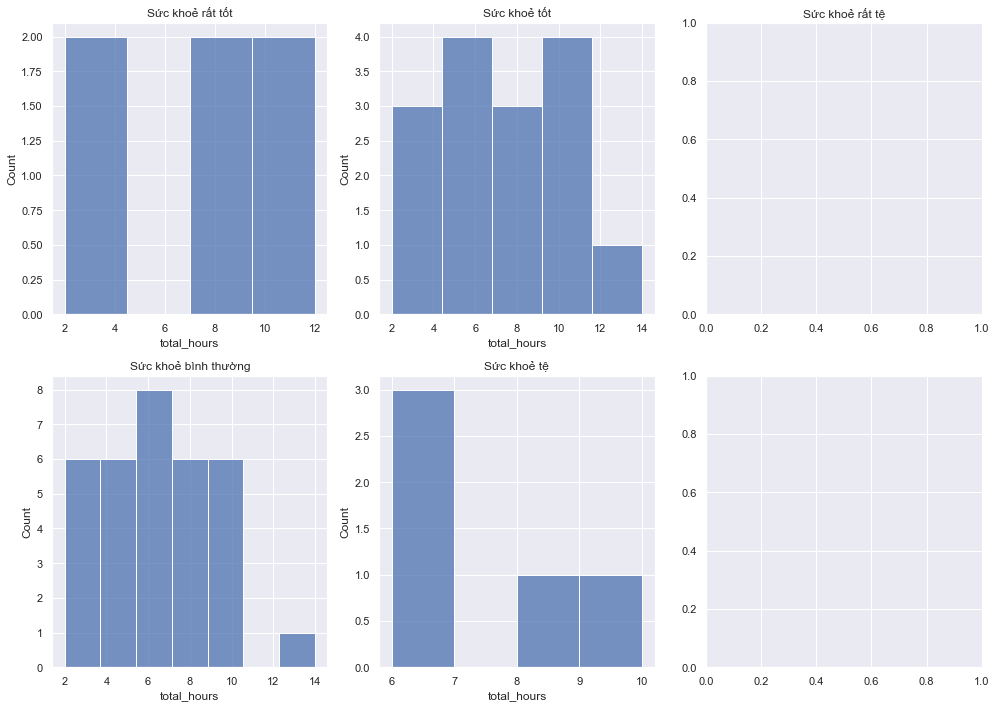

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid")
f, ax = plt.subplots(2, 3,figsize=(14, 10))
# sns.despine(f)

def histplot_total_time(key, ax, title):
    # print(new_data[new_data['result'] == key]['total_hours'].shape)
    sns.histplot(
        data= new_data[new_data['result'] == key]['total_hours'],
        ax=ax,
    )
    ax.set_title(title)

histplot_total_time(1, ax[0, 0], "Sức khoẻ rất tốt")
histplot_total_time(2, ax[0, 1], "Sức khoẻ tốt")
histplot_total_time(3, ax[1, 0], "Sức khoẻ bình thường")
histplot_total_time(4, ax[1, 1], "Sức khoẻ tệ")
histplot_total_time(5, ax[0, 2], "Sức khoẻ rất tệ")
plt.tight_layout()
plt.rcParams["figure.autolayout"] = True
plt.subplots_adjust(hspace = 0.25)


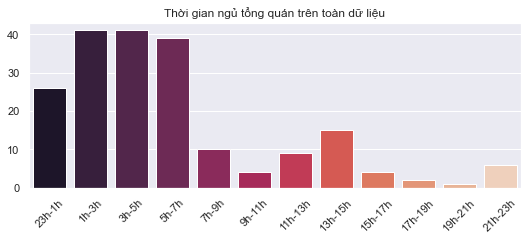

In [83]:

sum_time_frame_data = []
for time_frame in key_time_frame:
    sum_time_frame_data.append(sum(new_data[time_frame].values))
# sum_time_frame_data

sns.barplot(x=key_time_frame, y=sum_time_frame_data, palette="rocket")
plt.title("Thời gian ngủ tổng quán trên toàn dữ liệu")
plt.xticks(rotation=45)
plt.rcParams["figure.autolayout"] = True
plt.show()

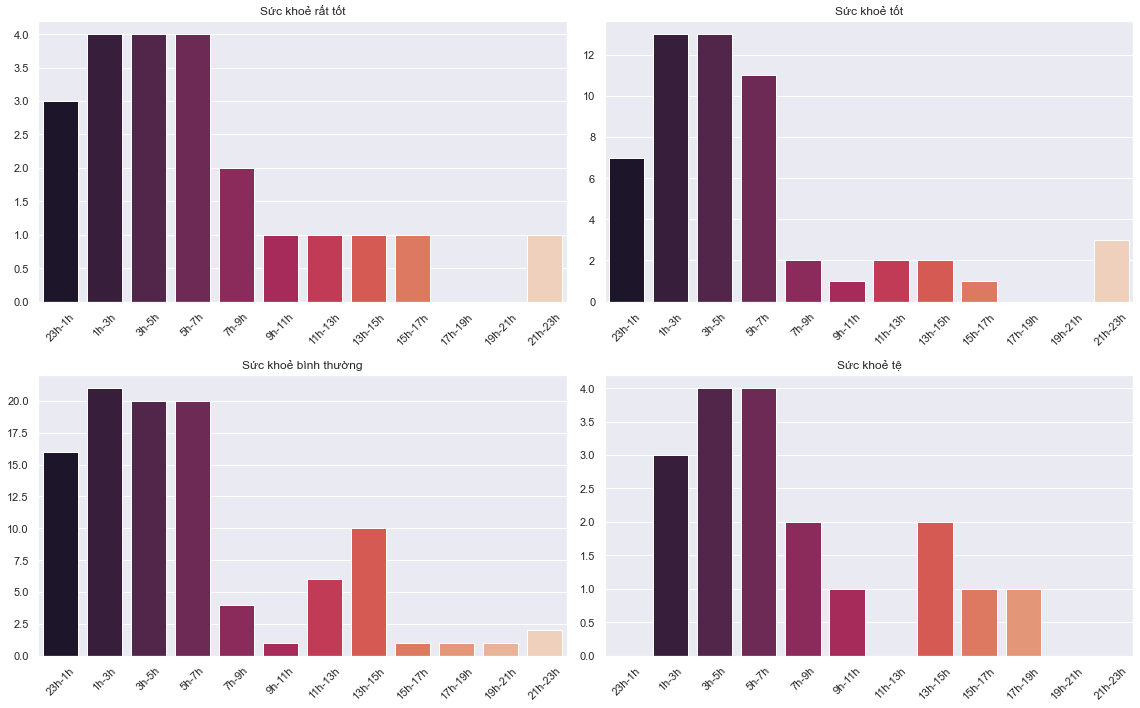

In [98]:
def barplot_time_frame(data, ax, title):
    sum_time_frame_data = []
    for time_frame in key_time_frame:
        sum_time_frame_data.append(sum(data[time_frame].values))
    sns.barplot(x=key_time_frame, y=sum_time_frame_data, palette="rocket", ax=ax)
    ax.set_title(title)
    ax.tick_params(labelrotation=45, axis='x')

f, ax = plt.subplots(2, 2,figsize=(16, 10))

barplot_time_frame(new_data[new_data['result'] == 1], ax[0,0], "Sức khoẻ rất tốt")
barplot_time_frame(new_data[new_data['result'] == 2], ax[0,1], "Sức khoẻ tốt")
barplot_time_frame(new_data[new_data['result'] == 3], ax[1,0], "Sức khoẻ bình thường")
barplot_time_frame(new_data[new_data['result'] == 4], ax[1,1], "Sức khoẻ tệ")

plt.tight_layout()
plt.rcParams["figure.autolayout"] = True
plt.show()